#### :  RL: Cart pole and lunar lander implementation:

In [ ]:
import gymnasium as gym
import numpy as numpy
import random
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plotter

import os


from IPython.display import HTML
from base64 import b64encode



seed = 42
random.seed(seed)
numpy.random.seed(seed)
torch.manual_seed(seed)


class ReplayBuffer:
    def __init__(self, capacity=50000):
        self.buffer = deque(maxlen=capacity)

    def add(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size=64):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)



class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 24),
            nn.ReLU(),
            nn.Linear(24, 24),
            nn.ReLU(),
            nn.Linear(24, action_dim)
        )

    def forward(self, x):
        return self.net(x)


env = gym.make("CartPole-v1")

state_dim = env.observation_space.shape[0]
print("State dimension:", state_dim)
action_dim = env.action_space.n
print("Action dimension:", action_dim)

q_net = QNetwork(state_dim, action_dim)
target_net = QNetwork(state_dim, action_dim)
target_net.load_state_dict(q_net.state_dict())

optimizer = optim.Adam(q_net.parameters(), lr=0.0005)
buffer = ReplayBuffer(capacity=10000)

gamma = 0.99
epsilon = 1.0
epsilon_min = 0.05

epsilon_decay = 0.999

batch_size = 64
target_update_freq = 20
max_episodes = 2000
max_steps = 500




def select_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, action_dim - 1)
    else:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = q_net(state_tensor)
        return q_values.argmax().item()


class Discretizer:
    def __init__(self, env, bins=100):
        self.bins = bins
        obs_space = env.observation_space
        self.low = obs_space.low
        self.high = obs_space.high

      
        self.low[1] = -3.0
        self.high[1] = 3.0
        self.low[3] = -3.0
        self.high[3] = 3.0

        self.bin_edges = [
            numpy.linspace(self.low[i], self.high[i], bins + 1)[1:-1]
            for i in range(len(self.low))
        ]

    def discretize(self, obs):
        return tuple(
            int(numpy.digitize(obs[i], self.bin_edges[i]))
            for i in range(len(obs))
        )

discretizer = Discretizer(env, bins=100)

State dimension: 4
Action dimension: 2


State dimension: 4
Action dimension: 2
Episode 0, Reward: 9.0, Epsilon: 0.999
Episode 10, Reward: 15.0, Epsilon: 0.989
Episode 20, Reward: 19.0, Epsilon: 0.979
Episode 30, Reward: 14.0, Epsilon: 0.969
Episode 40, Reward: 17.0, Epsilon: 0.960
Episode 50, Reward: 48.0, Epsilon: 0.929
Episode 60, Reward: 46.0, Epsilon: 0.745
Episode 70, Reward: 11.0, Epsilon: 0.642
Episode 80, Reward: 19.0, Epsilon: 0.551
Episode 90, Reward: 9.0, Epsilon: 0.483
Episode 100, Reward: 9.0, Epsilon: 0.425
Episode 110, Reward: 9.0, Epsilon: 0.374
Episode 120, Reward: 9.0, Epsilon: 0.331
Episode 130, Reward: 11.0, Epsilon: 0.300
Episode 140, Reward: 9.0, Epsilon: 0.300
Episode 150, Reward: 9.0, Epsilon: 0.300
Episode 160, Reward: 14.0, Epsilon: 0.300
Episode 170, Reward: 14.0, Epsilon: 0.300
Episode 180, Reward: 12.0, Epsilon: 0.300
Episode 190, Reward: 16.0, Epsilon: 0.300
Episode 200, Reward: 16.0, Epsilon: 0.300
Episode 210, Reward: 17.0, Epsilon: 0.300
Episode 220, Reward: 29.0, Epsilon: 0.300
Episode 230, 

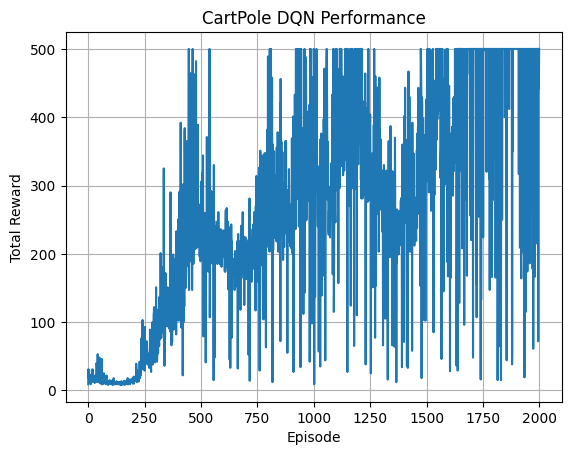

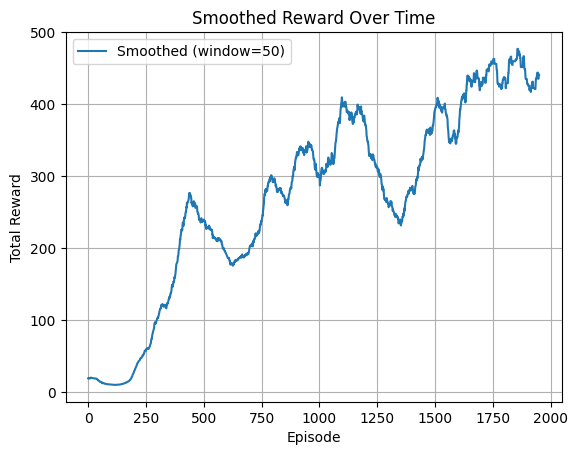

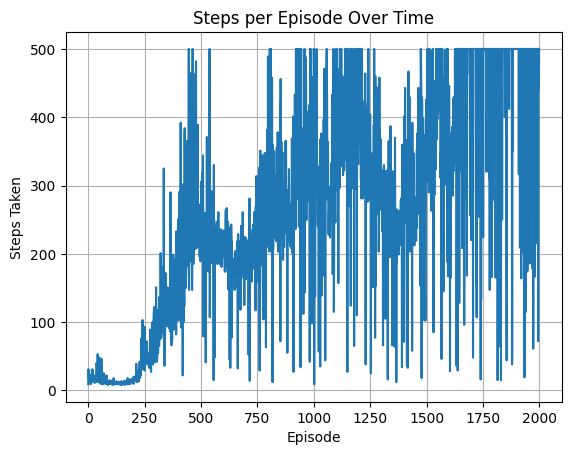

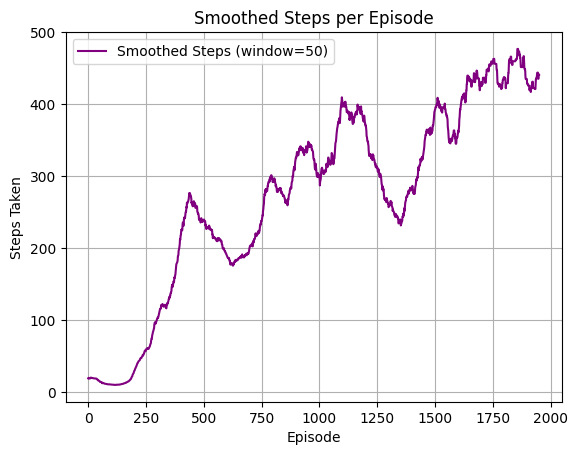

In [ ]:

import gymnasium as gym
import numpy as numpy
import random
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plotter

import os


from IPython.display import HTML
from base64 import b64encode



seed = 42
random.seed(seed)
numpy.random.seed(seed)
torch.manual_seed(seed)


class ReplayBuffer:
    def __init__(self, capacity=50000):
        self.buffer = deque(maxlen=capacity)

    def add(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size=64):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)



class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        self.net = nn.Sequential(
    nn.Linear(state_dim, 24),
    nn.ReLU(),
    nn.Linear(24, action_dim)
)

    def forward(self, x):
        return self.net(x)


env = gym.make("CartPole-v1")

state_dim = env.observation_space.shape[0]
print("State dimension:", state_dim)
action_dim = env.action_space.n
print("Action dimension:", action_dim)

q_net = QNetwork(state_dim, action_dim)
target_net = QNetwork(state_dim, action_dim)
target_net.load_state_dict(q_net.state_dict())

optimizer = optim.Adam(q_net.parameters(), lr=0.0005)
buffer = ReplayBuffer(capacity=50000)

gamma = 0.99
epsilon = 1.0
epsilon_min = 0.3

epsilon_decay = 0.999

batch_size = 64
target_update_freq = 20
max_episodes = 2000
max_steps = 500




def select_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, action_dim - 1)
    else:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = q_net(state_tensor)
        return q_values.argmax().item()


rewards_per_episode = []
steps_per_episode = []

for episode in range(max_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = select_action(state, epsilon)
        next_state, reward, done, trunc, _ = env.step(action)
        total_reward += reward

        buffer.add((state, action, reward, next_state, done or trunc))
        state = next_state

        if len(buffer) > 1000:
            epsilon = max(epsilon_min, epsilon * epsilon_decay)
            batch = buffer.sample(batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)

            states = torch.FloatTensor(numpy.array(states))
            actions = torch.LongTensor(actions).unsqueeze(1)
            rewards = torch.FloatTensor(rewards).unsqueeze(1)
            next_states = torch.FloatTensor(numpy.array(next_states))
            dones = torch.BoolTensor(dones).unsqueeze(1)

            q_pred = q_net(states).gather(1, actions)
            with torch.no_grad():
                q_next = target_net(next_states).max(1, keepdim=True)[0]
                q_target = rewards + gamma * q_next * (~dones)

            loss = nn.functional.mse_loss(q_pred, q_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done or trunc:
            break
    steps_per_episode.append(step + 1)

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)


    if episode % target_update_freq == 0:
        target_net.load_state_dict(q_net.state_dict())

    if episode % 10 == 0:
        print(f"Episode {episode}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")



from gymnasium.wrappers import RecordVideo
from IPython.display import HTML
from base64 import b64encode
import os

video_folder = "./videos"
os.makedirs(video_folder, exist_ok=True)

env_eval = RecordVideo(
    gym.make("CartPole-v1", render_mode="rgb_array"),
    video_folder=video_folder,
    episode_trigger=lambda episode_id: True,
    disable_logger=True,
    name_prefix="final_run"
)



import os
import glob
import torch
import numpy as np
from gymnasium.wrappers import RecordVideo
from base64 import b64encode
from IPython.display import HTML
import matplotlib.pyplot as plt


video_folder = "./videos"
os.makedirs(video_folder, exist_ok=True)


for f in glob.glob(os.path.join(video_folder, "*.mp4")):
    os.remove(f)


env_eval = RecordVideo(
    gym.make("CartPole-v1", render_mode="rgb_array"),
    video_folder=video_folder,
    episode_trigger=lambda episode_id: episode_id == 0,  
    name_prefix="dqn-eval",
    disable_logger=True
)


state, _ = env_eval.reset()
done = False
total_reward = 0

while not done:
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
    with torch.no_grad():
        action = q_net(state_tensor).argmax().item()
    state, reward, done, trunc, _ = env_eval.step(action)
    total_reward += reward
    if done or trunc:
        break


env_eval.close()
print(f"Total reward in greedy run: {total_reward}")


video_files = sorted([f for f in os.listdir(video_folder) if f.endswith(".mp4")])
video_path = os.path.join(video_folder, video_files[-1])


with open(video_path, "rb") as f:
    video_data = f.read()
encoded = b64encode(video_data).decode("ascii")

display(HTML(f"""
<video width="640" height="480" controls autoplay loop>
    <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
</video>
"""))


plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("CartPole DQN Performance")
plt.grid(True)
plt.show()


def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.figure()
plt.plot(moving_average(rewards_per_episode), label=f"Smoothed (window=50)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Smoothed Reward Over Time")
plt.grid(True)
plt.legend()
plt.show()


plt.figure()
plt.plot(steps_per_episode)
plt.xlabel("Episode")
plt.ylabel("Steps Taken")
plt.title("Steps per Episode Over Time")
plt.grid(True)
plt.show()


plt.figure()
plt.plot(moving_average(steps_per_episode), label="Smoothed Steps (window=50)", color='purple')
plt.xlabel("Episode")
plt.ylabel("Steps Taken")
plt.title("Smoothed Steps per Episode")
plt.grid(True)
plt.legend()
plt.show()




#### Lunar Lander:

State dimension: 8
Action dimension: 4
Episode 0, Reward: -235.69, Epsilon: 0.995
Episode 10, Reward: -97.77, Epsilon: 0.946
Episode 20, Reward: -108.17, Epsilon: 0.900
Episode 30, Reward: -455.12, Epsilon: 0.856
Episode 40, Reward: -244.84, Epsilon: 0.814
Episode 50, Reward: -295.73, Epsilon: 0.774
Episode 60, Reward: -125.64, Epsilon: 0.737
Episode 70, Reward: -69.92, Epsilon: 0.701
Episode 80, Reward: -46.19, Epsilon: 0.666
Episode 90, Reward: -163.55, Epsilon: 0.634
Episode 100, Reward: -151.61, Epsilon: 0.603
Episode 110, Reward: -216.27, Epsilon: 0.573
Episode 120, Reward: 9.63, Epsilon: 0.545
Episode 130, Reward: -99.13, Epsilon: 0.519
Episode 140, Reward: -54.09, Epsilon: 0.493
Episode 150, Reward: -13.44, Epsilon: 0.469
Episode 160, Reward: -44.49, Epsilon: 0.446
Episode 170, Reward: -30.88, Epsilon: 0.424
Episode 180, Reward: -79.90, Epsilon: 0.404
Episode 190, Reward: -106.79, Epsilon: 0.384
Episode 200, Reward: -24.30, Epsilon: 0.365
Episode 210, Reward: -95.57, Epsilon: 0.

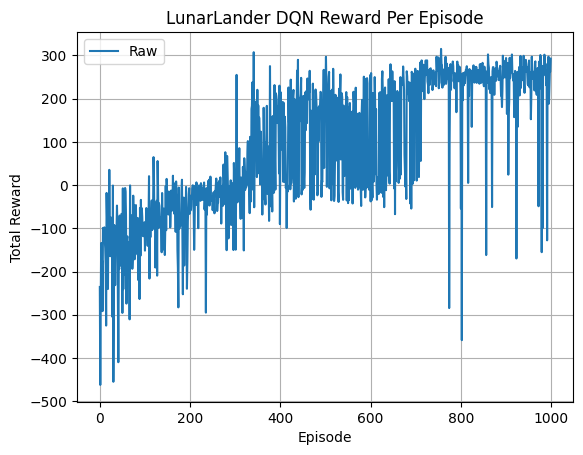

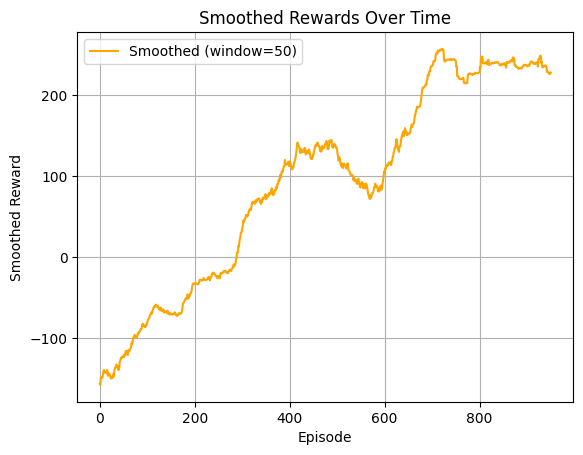

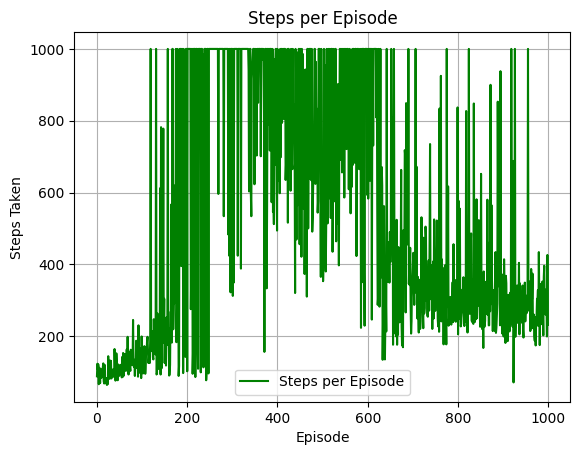

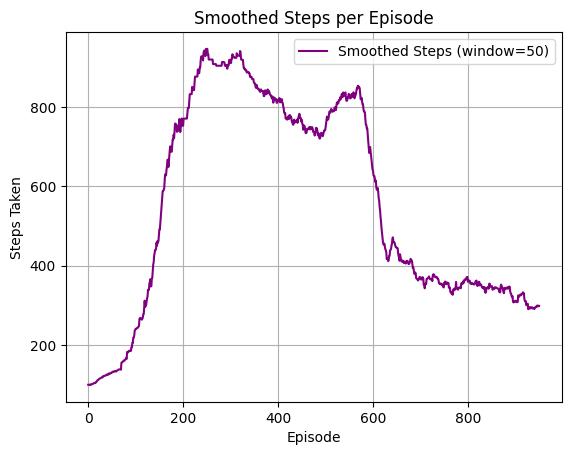

/root/mlai/reinforcementLearning/cw3/dwn/lib/python3.10/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /root/mlai/reinforcementLearning/cw3/videos_lander folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Total reward in greedy run: 289.8064045656535, Steps: 285


In [ ]:
import gymnasium as gym
import numpy as np
import random
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from base64 import b64encode
from IPython.display import HTML


env = gym.make("LunarLander-v3")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
print("State dimension:", state_dim)
print("Action dimension:", action_dim)


class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, action_dim)
        )

    def forward(self, x):
        return self.net(x)


class ReplayBuffer:
    def __init__(self, capacity=50000):
        self.buffer = deque(maxlen=capacity)

    def add(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size=64):
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        return len(self.buffer)


q_net = QNetwork(state_dim, action_dim)
target_net = QNetwork(state_dim, action_dim)
target_net.load_state_dict(q_net.state_dict())

optimizer = optim.Adam(q_net.parameters(), lr=0.0005)
buffer = ReplayBuffer(capacity=50000)

gamma = 0.99
epsilon = 1.0
epsilon_min = 0.05
epsilon_decay = 0.995  
batch_size = 64
target_update_freq = 10
max_episodes = 1000
max_steps = 1000


def select_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, action_dim - 1)
    else:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = q_net(state_tensor)
        return q_values.argmax().item()


steps_per_episode = [] 

rewards_per_episode = []
for episode in range(max_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        action = select_action(state, epsilon)
        next_state, reward, done, trunc, _ = env.step(action)
        total_reward += reward

        buffer.add((state, action, reward, next_state, done or trunc))
        state = next_state

        if len(buffer) > 1000:
            batch = buffer.sample(batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)

            states = torch.FloatTensor(np.array(states))
            actions = torch.LongTensor(actions).unsqueeze(1)
            rewards = torch.FloatTensor(rewards).unsqueeze(1)
            next_states = torch.FloatTensor(np.array(next_states))
            dones = torch.BoolTensor(dones).unsqueeze(1)

            q_pred = q_net(states).gather(1, actions)
            with torch.no_grad():
                q_next = target_net(next_states).max(1, keepdim=True)[0]
                q_target = rewards + gamma * q_next * (~dones)

            loss = nn.functional.mse_loss(q_pred, q_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done or trunc:
            break
    steps_per_episode.append(step + 1)

    rewards_per_episode.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    if episode % target_update_freq == 0:
        target_net.load_state_dict(q_net.state_dict())

    if episode % 10 == 0:
        print(f"Episode {episode}, Reward: {total_reward:.2f}, Epsilon: {epsilon:.3f}")


plt.figure()
plt.plot(rewards_per_episode, label="Raw")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("LunarLander DQN Reward Per Episode")
plt.grid(True)
plt.legend()
plt.show()


def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

plt.figure()
plt.plot(moving_average(rewards_per_episode), label="Smoothed (window=50)", color='orange')
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward")
plt.title("Smoothed Rewards Over Time")
plt.grid(True)
plt.legend()
plt.show()


plt.figure()
plt.plot(steps_per_episode, label="Steps per Episode", color='green')
plt.xlabel("Episode")
plt.ylabel("Steps Taken")
plt.title("Steps per Episode")
plt.grid(True)
plt.legend()
plt.show()



plt.figure()
plt.plot(moving_average(steps_per_episode), label="Smoothed Steps (window=50)", color='purple')
plt.xlabel("Episode")
plt.ylabel("Steps Taken")
plt.title("Smoothed Steps per Episode")
plt.grid(True)
plt.legend()
plt.show()



import os, glob
from gymnasium.wrappers import RecordVideo

video_folder = "./videos_lander"
os.makedirs(video_folder, exist_ok=True)


for f in glob.glob(os.path.join(video_folder, "*.mp4")):
    os.remove(f)


env_eval = RecordVideo(
    gym.make("LunarLander-v3", render_mode="rgb_array"),
    video_folder=video_folder,
    episode_trigger=lambda episode_id: episode_id == 0,
    name_prefix="lander_run",
    disable_logger=True
)


state, _ = env_eval.reset()
done = False
total_reward = 0
steps = 0

while not done:
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
    with torch.no_grad():
        action = q_net(state_tensor).argmax().item()
    state, reward, done, trunc, _ = env_eval.step(action)
    total_reward += reward
    steps += 1
    if done or trunc:
        break

env_eval.close()
print(f"Total reward in greedy run: {total_reward}, Steps: {steps}")


from base64 import b64encode
from IPython.display import HTML

video_files = sorted([f for f in os.listdir(video_folder) if f.endswith(".mp4")])
video_path = os.path.join(video_folder, video_files[-1])
with open(video_path, "rb") as f:
    video_data = f.read()
encoded = b64encode(video_data).decode("ascii")

display(HTML(f"""
<video width="640" height="480" controls autoplay loop>
    <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
</video>
"""))



#### Declarations:

References:
https://gymnasium.farama.org/environments/classic_control/cart_pole/
https://gymnasium.farama.org/environments/box2d/lunar_lander/
